In [6]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import timedelta as delta
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.lines import Line2D
import matplotlib.cm  as cm
import matplotlib.animation as animation

In [9]:
river_sources = np.load('../river_sources.npy', allow_pickle=True).item()

In [7]:
posterior_avg = np.load('../data/analysis/sa-S03/posterior_sa-S03_average30.npy', allow_pickle=True).item()
# likelihood_avg = np.load('../data/analysis/fail1/likelihood_average.npy', allow_pickle=True).item()
params = np.load('../data/analysis/sa-S03/params_sa-S03_average30.npy', allow_pickle=True).item()
posterior_avg_1500 = np.load('../data/analysis/sa-S03/posterior_sa-S03_average1500.npy', allow_pickle=True).item()

Text(0.1, 0.93, '4.1 years average')

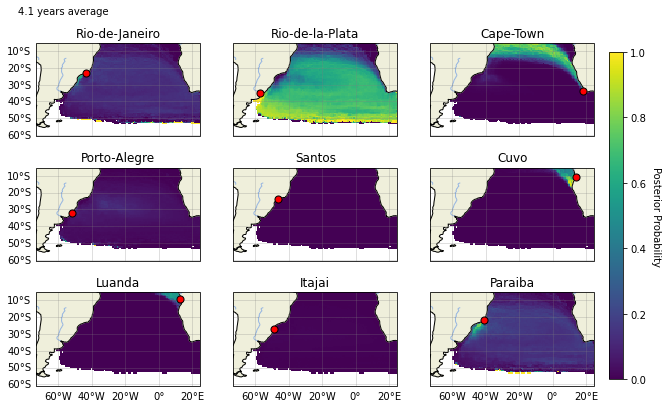

In [17]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=0

labels=list(posterior_avg.keys())

fig,ax = plt.subplots(ncols=3,nrows=3,figsize=(10,6.5),
                      subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

ax = ax.reshape(9)

for k, loc in enumerate(labels):
    
    z = posterior_avg_1500[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='viridis', vmax=1)
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
    
    if k in [1,2,4,5,7,8]:
        gl.left_labels = False
        
    if k in [0,1,2,3,4,5]:
        gl.bottom_labels = False
        
    gl.top_labels = False
    gl.right_labels = False
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='red', edgecolors='k', zorder=3)

bar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=bar_ax, orientation='vertical')
cbar.set_label('Posterior Probability', rotation=270, labelpad=15)
# fig.text(0.1,0.93,f'Particle age = {t:0.0f} days')
fig.text(0.1,0.93,f'4.1 years average')

# Beaching probability

Detect new coastal cells after computing the histogram?

In [19]:
landmask = np.load('../landmask.npy')

In [22]:
posterior_avg_1500['Luanda'].shape

(1, 120, 90)

In [21]:
landmask.shape

(899, 1176)

In [ ]:
def coarsen(array, x, y, factor):
    """
    Function to coarsen a 2d array by a especified factor.
    WARNING: If array dimensions are not multiples of the
    factor it trims the array to make it a multiple of the
    factor.
    array: 2d numpy array.
    factor: positive integer.

    Returns: 2d numpy array.

    warning: if the shape of array is not a multiple of factor
    You loose %factor number of rows/colums.
    """
    q = array.shape[0]//factor
    w = array.shape[1]//factor
    k = array.shape[0] - array.shape[0] % factor
    m = array.shape[1] - array.shape[1] % factor
    array = array[:k, :m]
    aux = array.reshape((array.shape[0]//factor, factor,
                         array.shape[1]//factor, factor))
    array = np.sum(aux, axis=(1, 3))
    x = np.linspace(x[0], x[-1], q)
    y = np.linspace(y[0], y[-1], w)
    return array, x, y